# 7장 실습 - 기하학적 변환

# ▶ 기하학적 변환
- 영상을 구성하는 화소의 공간적 위치를 재배치하는 과정
- 재배치가 되는 영상의 화소가 어떤 것이냐에 따라
    - 전방향 사상
        - 입력 영상을 출력 영상으로 화소의 위치를 변환하는 과정
        - 입력 영상의 모든 화소에서 출력 영상의 새로운 화소 위치를 계산하고, 입력 화소의 밝기값을 출력 영상의 새로운 위치에 복사하는 방법
            - 오버랩(Overlap) 문제: 서로 다른 입력 화소 두 개가 같은 출력 화소에 사상되는것
            - 홀(Hole) 문제: 입력 영상에서 임의의 화소가 목적 영상의 화소에 사상되지 않을 때
    - 역방향 사상
        - 출력 영상을 입력 영상으로 화소의 위치를 변환하는 과정
        - 목적 영상의 화소를 조사하여 몇 가지 역변환으로 원시 영상의 화소를 구한 뒤 목적 영상의 화소값을 생성하려고 사용
- 기본 형태에 따라
    - 선형 기하 변환
        - 직선 처리처럼 선형적으로 처리하는 방법으로, 평행이동(Translation), 회전(Rotation), 스케일링(Scaling) 등 화소의 재배치 수행
    - 비선형 기하 변환
        - 영상을 찌그러뜨리고 구부려서 곡선으로 처리하는 방법으로, 워핑(Warping)과 모핑(Morphing)이 대표적

## ■ 보간법
- 영상을 확대하고 축소하는 스케일링 과정은 화소가 값을 할당받지 못할 때 발생할 때 빈 화소에 값을 할당하는 과정
- 화소값을 할당받지 못한 목적 영상의 품질은 아주 좋지 못한데, 빈 화소에 값을 할당하여 좋은 품질의 영상을 만드는 방법
- 화소의 값을 할당받지 못한 채 목적 영상을 만드는 대표적인 기하학 처리가 영상의 확대

## ■ 대표적인 보간법
- 가장 인접한 이웃 화소 보간법(Nearest Neighbor Interpolation)
    - 값을 할당받지 못한 목적 영상의 화소에서 가장 가깝게 이웃한 원시 화소의 값을 할당받은 목적 영상의 화소값을 복사해서 사용하는 것
    - 단순히 이웃 화소를 복사하여 사용하므로 처리 속도가 빠름
    - 새로운 화소값을 계산하지 않고 입력 화소 내에서만 찾기 때문에 원래의 영상과 전혀 다른 영상을 출력하는 오류가 발생
        - 하나의 입력 화소에 대응하는 출력 화소 수가 많을수록 영상의 질은 떨어지며, 영상 내에 톱니 모양이라고 하는 시각적인 뭉툭함(Blockiness)이 발생
- 양선형 보간법(Bilinear Interpolation)
    - 원시 영상의 화소값 두 개를 이용하여 원하는 좌표에서 새로운 화소값을 계산하는 선형 보간을 바탕으로 수행
    - 화소당 선형 보간을 세 번 수행하며, 새롭게 생성된 화소는 가장 가까운 화소 네 개에 가중치를 곱한 값을 합해서 얻음
        - 각 가중치는 각 화소에서의 거리에 정비례하도록 선형적으로 선택
- 3차 회선 보간법(Cubic Convolution Interpolation)
    - 4×4의 이웃 화소를 참조하여 보간을 수행
    - 양선형 보간법보다 더 많은 화소를 참조하므로 보간된 영상의 품질도 더 좋음
    - 이웃 화소를 16개 참조하므로 계산 시간이 더 소요됨
- B-스플라인 보간법(B-Spline Interpolation)
    - B-스플라인 함수는 좋은 저주파 통과 필터
    - 보간 함수 중에서 가장 스무딩한 영상 출력

In [1]:
### Package
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim"

## ■ 스케일링(Scaling)
- 디지털 영상의 모양은 변화시키지 않은 채 크기만을 확대하거나 축소하는 변환
    - 영상을 확대하는 것을 확대(Magnification), 스케일링 업(Scaling Up), 줌(Zooming), 업 샘플링(Up Sampling)
    - 영상을 축소하는 것을 축소(Minification), 스케일링 다운(Scaling Down), 데시메이션(Decimation), 다운 샘플링(Down Sampling)

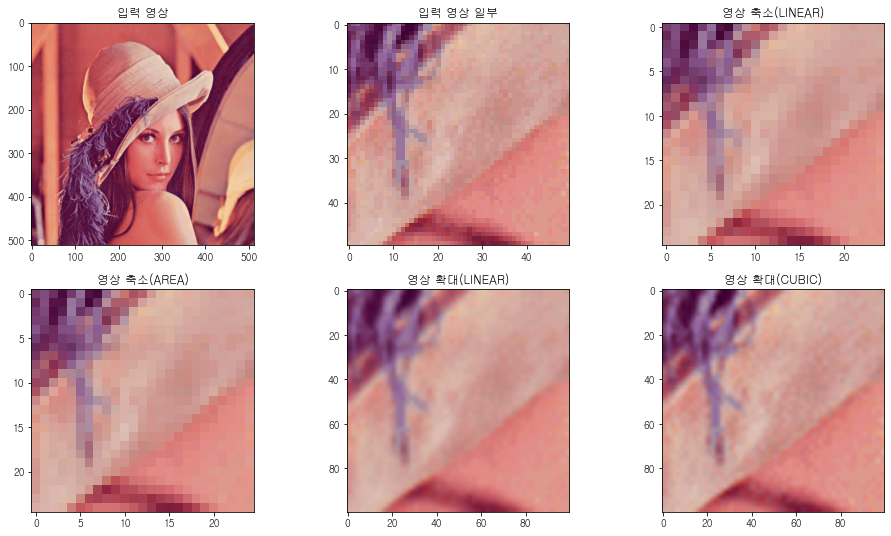

In [3]:
### 영상 읽기
img_lena = cv2.imread(r'C:\Users\sse88\Downloads\lena_color.png')
img_lena_sub = img_lena[200:250,250:300,:].copy()
height, width = img_lena_sub.shape[:2]

### 영상 축소
img_resize_1 = cv2.resize(img_lena_sub, dsize=(int(width/2), int(height/2)), interpolation=cv2.INTER_LINEAR)
img_resize_2 = cv2.resize(img_lena_sub, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

### 영상 확대
img_resize_3 = cv2.resize(img_lena_sub, dsize=(int(width*2), int(height*2)), interpolation=cv2.INTER_LINEAR)
img_resize_4 = cv2.resize(img_lena_sub, dsize=(0, 0), fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

### 영상 출력
titles = ["입력 영상", "입력 영상 일부", "영상 축소(LINEAR)",
          "영상 축소(AREA)", "영상 확대(LINEAR)", "영상 확대(CUBIC)"]
images = [img_lena, img_lena_sub, img_resize_1,
          img_resize_2, img_resize_3, img_resize_4]
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    #plt.axis('off')
plt.show()

## ■ 이동(Translation)
- 디지털 영상을 평면의 한 위치에서 원하는 다른 위치로 옮기는 연산
- 디지털 영상의 크기나 형태 등이 바뀌지 않아 원본 영상과 결과 같음

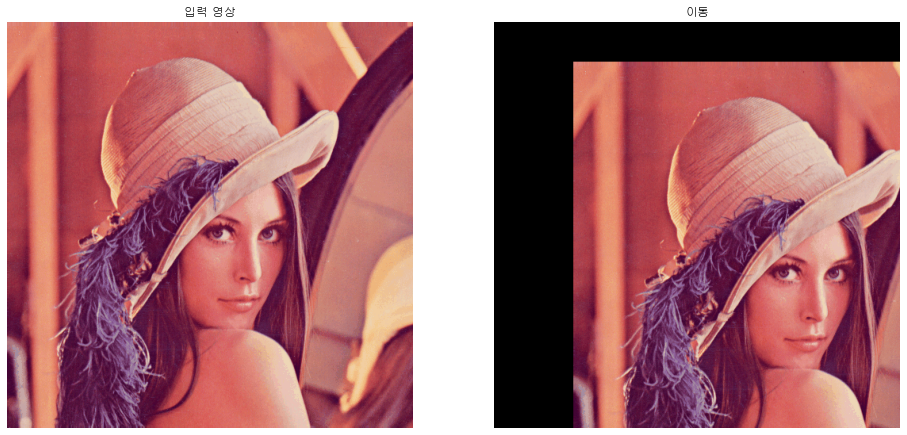

In [4]:
### 영상의 크기
height, width = img_lena.shape[:2]

### 변환 행렬, X축으로 100, Y축으로 50 이동
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img_lena, M, (width, height))

### 영상 출력
titles = ["입력 영상", "이동"]
images = [img_lena, dst]
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 대칭(Mirroring)
- 영상을 가로축이나 세로축으로 뒤집는 것
    - 좌우 대칭: 세로축을 기준으로 뒤집는 것
    - 상하 대칭: 가로축을 기준으로 뒤집는 것

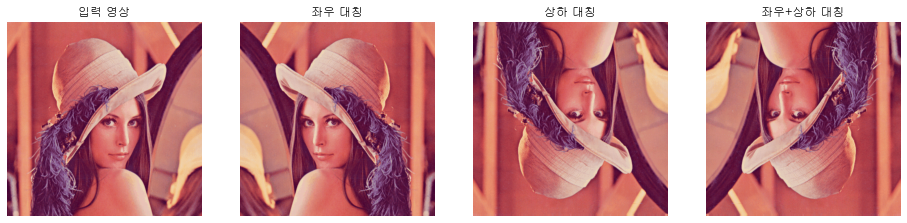

In [5]:
### 좌우 대칭
flipVertical = cv2.flip(img_lena, 1)

### 상하 대칭
flipHorizontal = cv2.flip(img_lena, 0)

### 좌우+상하 대칭
flipBoth = cv2.flip(img_lena, -1)

### 영상 출력
titles = ["입력 영상", "좌우 대칭", "상하 대칭", "좌우+상하 대칭"]
images = [img_lena, flipVertical, flipHorizontal, flipBoth]
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 회전(Rotation)
- 영상을 임의의 방향으로 특정한 각도 θ만큼 회전시키는 것

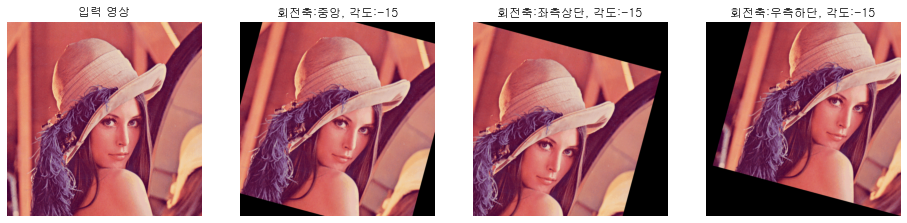

In [6]:
### 영상의 크기
height, width = img_lena.shape[:2]

### 변환 행렬 계산 - 회전축:중앙, 각도:-15, 배율:1
M = cv2.getRotationMatrix2D((width/2, height/2), -15, 1)
### 변환 행렬 적용 - 회전 영상
img_rot_1 = cv2.warpAffine(img_lena, M, (height, width))

### 변환 행렬 계산 - 회전축:좌측상단, 각도:-15, 배율:1
M = cv2.getRotationMatrix2D((0, 0), -15, 1)
### 변환 행렬 적용 - 회전 영상
img_rot_2 = cv2.warpAffine(img_lena, M, (height, width))

### 변환 행렬 계산 - 회전축:우측하단, 각도:-15, 배율:1
M = cv2.getRotationMatrix2D((width, height), -15, 1)
### 변환 행렬 적용 - 회전 영상
img_rot_3 = cv2.warpAffine(img_lena, M, (height, width))

### 영상 출력
titles = ["입력 영상", "회전축:중앙, 각도:-15", "회전축:좌측상단, 각도:-15", "회전축:우측하단, 각도:-15"]
images = [img_lena, img_rot_1, img_rot_2, img_rot_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 워핑(Warping)
- 비선형이나 왜곡 변환을 수행
- 고무시트 변환(Rubber Sheet Transform)이라고도 함
    - 화소별로 이동 정도를 달리해 고무판 위에 그린 영상을 임의로 구부린 듯한 효과
- 원근 변환(perspective transform)
    - 사람의 시각에 따라 원근감을 주는 변환

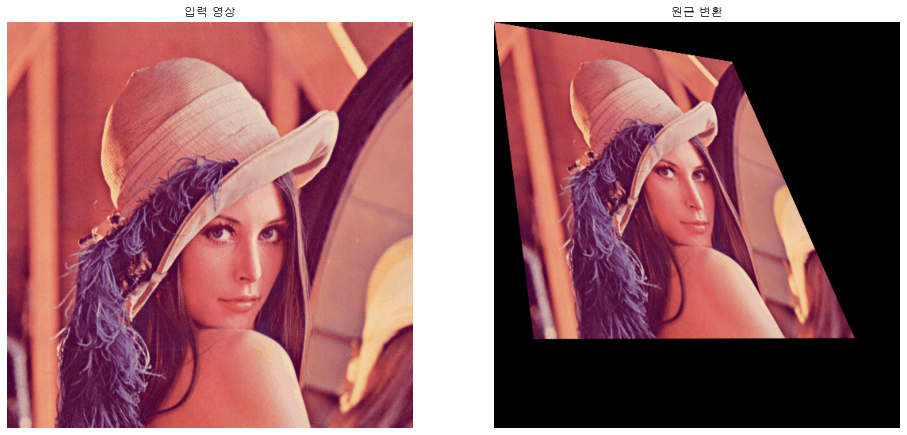

In [8]:
### 영상의 크기
height, width = img_lena.shape[:2]

### 소스 이미지의 사각형 꼭짓점 좌표
src_interest_pts = np.float32([[0,0],[512,0],[512,612],[0,512]])
### 대상 이미지에서 해당하는 사각형 꼭짓점의 좌표
Projective_interest_pts = np.float32([[0,0],[300,50],[500,500],[50,400]])

M = cv2.getPerspectiveTransform(src_interest_pts, Projective_interest_pts)
img_warp = cv2.warpPerspective(img_lena, M, (width, height))

### 영상 출력
titles = ["입력 영상", "원근 변환"]
images = [img_lena, img_warp]
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 모핑(morphing)
- 한 영상을 서서히 변화시켜 다른 영상으로 변환하는 기술
- 원본 영상과 최종 영상은 물론, 최종 영상으로 매끄럽게 변할 수 있도록 많은 중간 단계의 영상도 필요함
    - 전이 모핑: 초기 영상과 최종 영상이 달라 전혀 다른 내용으로 변하는 것
    - 왜곡 모핑: 영상의 일부분이 변하는 것